In [1]:
import numpy as np
import matplotlib.pyplot as plt

import polyseq as pseq

%matplotlib inline
np.random.seed(42)

In [2]:
# only need to run once
pseq.io.download_example_data()

In [2]:
data = pseq.io.read_cellranger("/Users/jason/Documents/data/fly-rnaseq/sample-3")

In [2]:
data = pseq.io.load_example()

data_brain = pseq.io.load_example("brain")
data_vnc = pseq.io.load_example("vnc")

data = pseq.concat(data_brain, data_vnc)

data

Nep3  tRNA:Pro-CGG-1-1  CG9570  Or19b  CG15322  Or19a  karr  \
sample cell                                                                
0      0        0                 0       0      0        0      0     0   
       1        0                 0       0      0        0      0     0   
       2        0                 0       0      0        0      0     0   
       3        0                 0       0      0        0      0     0   
       4        0                 0       0      0        0      0     0   
       5        0                 0       0      0        0      0     0   
       6        0                 0       0      0        0      0     0   
       7        0                 0       0      0        0      0     0   
       8        0                 0       0      0        0      0     0   
       9        0                 0       0      0        0      0     0   
       10       1                 0       0      0        0      0     0   
       11       0                 0       0      0        0      0     0   
       12       0                 0       0      0        0      0     0   
       13       0                 0       0      0        0      0     0   
       14       0                 0       0      0        0      0     0   
       15       0                 0       0      0        0      0     0   
       16       0                 0       0      0        0      0     0   
       17       0                 0       0      0        0      0     0   
       18       0                 0       0      0        0      0     0   
       19       0                 0       0      0        0      0     0   
       20       0                 0       0      0        0      0     0   
       21       0                 0       0      0        0      0     0   
       22       0                 0       0      0        0      0     0   
       23       0                 0       0      0        0      0     0   
       24       0                 0       0      0        0      0     0   
       25       0                 0       0      0        0      0     0   
       26       0                 0       0      0        0      0     0   
       27       0                 0       0      0        0      0     0   
       28       0                 0       0      0        0      0     0   
       29       0                 0       0      0        0      0     0   
...           ...               ...     ...    ...      ...    ...   ...   
1      470      0                 0       0      0        0      0     0   
       471      0                 0       0      0        0      0     0   
       472      0                 0       0      0        0      0     0   
       473      0                 0       0      0        0      0     0   
       474      0                 0       0      0        0      0     0   
       475      0                 0       0      0        0      0     0   
       476      0                 0       0      0        0      0     0   
       477      0                 0       0      0        0      0     0   
       478      0                 0       0      0        0      0     0   
       479      0                 0       0      0        0      0     0   
       480      0                 0       0      0        0      0     0   
       481      0                 0       0      0        0      0     0   
       482      0                 0       0      0        0      0     0   
       483      0                 0       0      0        0      0     0   
       484      0                 0       0      0        0      0     0   
       485      0                 0       0      0        0      0     0   
       486      0                 0       0      0        0      0     0   
       487      0                 0       0      0        0      0     0   
       488      0                 0       0      0        0      0     0   
       489      0                 0       0      0        0  

In [3]:
dropped = data.drop_cells(umis=1).drop_genes(num_cells=1)
print(data.shape)
print(dropped.shape)

(9058, 17492)
(9058, 11633)


,min,max,mean,median
umis,0,2638,0,0
umis above 0,1,2638,2,1
umis per cell,743,14707,1463,1178
genes expressed,263,3025,736,662
umis per gene,1,757904,1139,159
cells expressing,0,9058,175,3


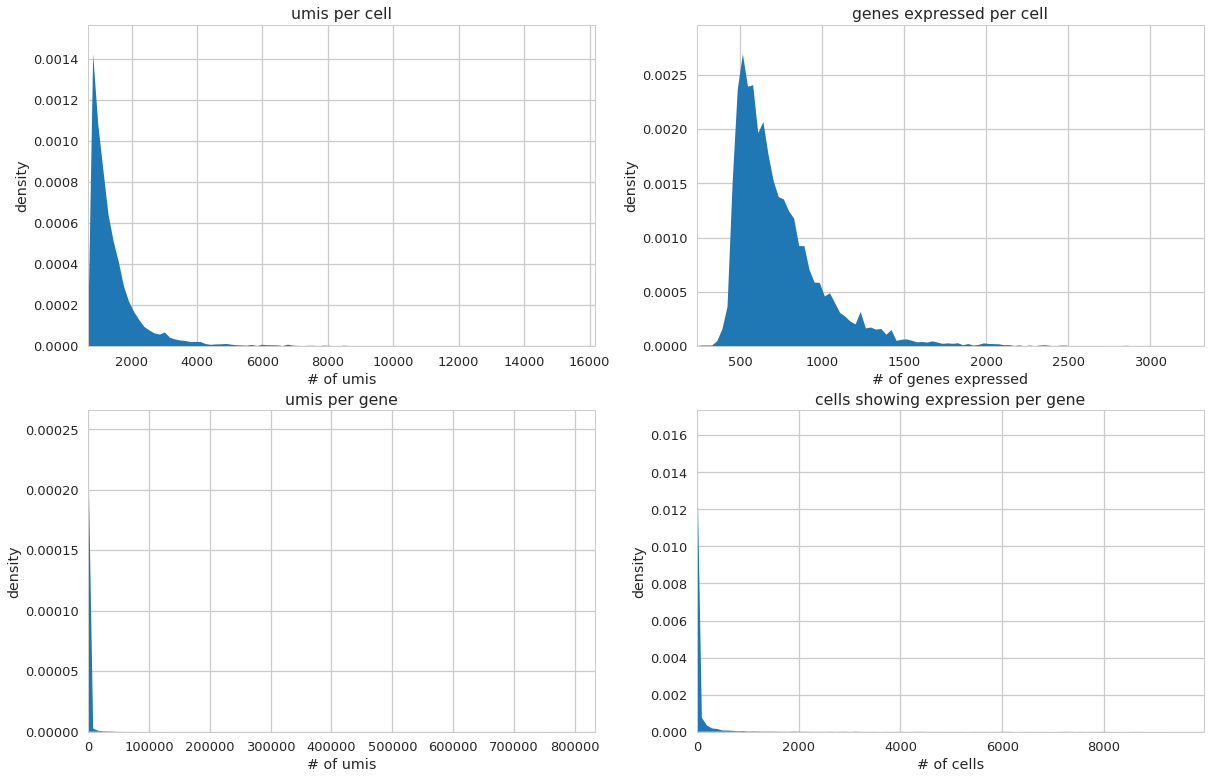

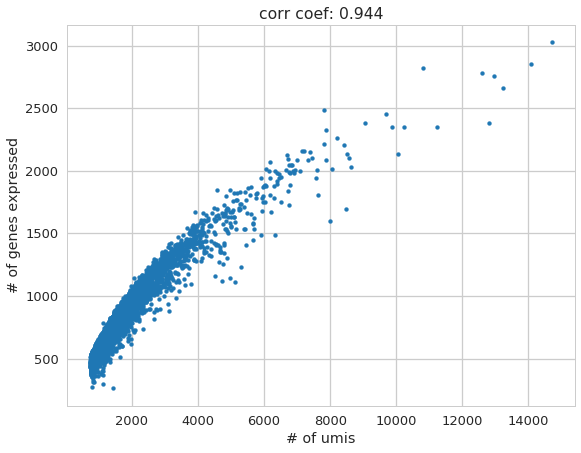

In [4]:
stats = pseq.summary.summarize(dropped)
stats

In [5]:
normed = dropped.log_normalize()
total = normed.sum(axis=1)
regressed = pseq.regress(normed, total)
regressed.head()

,Nep3,CG12655,CG33217,Vps11,RpL10,G9a,cin,CG3777,CG12470,y,...,Plap,CG5080,Tfb4,Iris,Pino,CG4629,S,EGFP,tdTomato,GAL4
cell,,,,,,,,,,,,,,,,,,,,,
0,-0.302168,-0.027613,-0.423143,-0.373702,0.698331,-0.536622,-0.195421,-0.047810,-0.027936,-0.204371,...,-0.274901,-0.196671,6.618168,-0.013902,-0.246735,-0.265626,-0.549930,-0.248042,-0.276584,-0.117698
1,-0.163942,-0.017214,-0.183809,-0.163957,0.563796,-0.272702,-0.110436,0.003935,-0.003328,-0.051847,...,-0.096359,-0.145852,-0.071916,-0.005318,-0.090407,-0.140231,-0.215161,-0.067351,-0.072890,-0.076828
2,-0.236517,-0.022674,-0.309470,-0.274082,-0.535477,-0.411272,-0.155057,-0.023233,-0.016248,-0.131929,...,-0.190102,-0.172534,-0.139683,-0.009825,-0.172486,-0.206069,2.197689,-0.162222,-0.179838,-0.098287
3,-0.157226,-0.016708,-0.172180,-0.153765,-0.782552,-0.259878,6.045203,0.006449,-0.002132,-0.044435,...,-0.087684,-0.143382,-0.065645,-0.004901,-0.082811,-0.134138,-0.198895,-0.058572,-0.062992,-0.074842
4,-0.174692,-0.018023,-0.202423,-0.180269,0.486696,-0.293228,-0.117046,-0.000089,-0.005242,-0.063709,...,-0.110245,-0.149804,-0.081955,-0.005985,-0.102565,-0.149984,-0.241198,-0.081404,-0.088732,-0.080007


,pc-0,pc-1,pc-2,pc-3,pc-4,pc-5,pc-6,pc-7,pc-8,pc-9,pc-10,pc-11,pc-12,pc-13,pc-14
cell,,,,,,,,,,,,,,,
0,-10.632614,0.719018,4.513167,-1.628575,2.254171,-4.799047,0.584408,-1.410151,-5.080009,-2.472267,0.880199,-1.807750,3.063401,1.918536,-0.674884
1,2.982476,-1.833460,-0.511065,1.355364,-0.627552,0.481953,0.173985,2.435224,2.046183,0.566463,-0.600802,-0.680341,-0.363587,-0.585800,0.389354
2,-2.735075,1.916880,3.745109,-0.658144,-0.057505,-1.017697,-0.337651,0.071055,-1.536118,-0.003201,1.193115,0.761282,-0.219844,-0.783188,0.668961
3,2.594209,-3.401741,-0.953151,1.080296,-1.344989,1.198549,-0.469017,2.040965,0.420630,0.676901,-0.589156,-1.043478,0.092514,0.089902,-0.217026
4,-0.615115,-4.791893,-2.049074,-0.214309,0.363527,0.782522,-0.828458,0.652455,1.227564,-1.132617,-0.250467,1.730339,0.778426,0.288682,0.902718


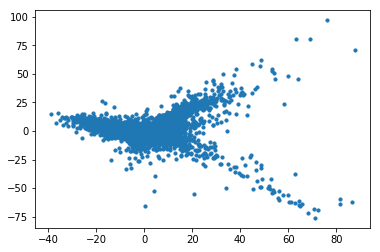

In [6]:
reduced = pseq.dim.pca(regressed, k=15)

plt.scatter(reduced['pc-0'], reduced['pc-1'], s=10)
reduced.head()

In [7]:
clusters = pseq.clustering.graph_cluster(reduced, n_neighbors=100)
print("# of clusters: {}".format(len(np.unique(clusters))))

# go back and attach the results to the data
normed.clusters = clusters
reduced.clusters = clusters
normed.head()

Finding 100 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.6453509330749512 seconds
Jaccard graph constructed in 8.768020153045654 seconds
Wrote graph to binary file in 4.154191970825195 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.80749
After 3 runs, maximum modularity is Q = 0.810602
Louvain completed 23 runs in 10.559877157211304 seconds
PhenoGraph complete in 24.23679804801941 seconds
# of clusters: 13


,,Nep3,CG12655,CG33217,Vps11,RpL10,G9a,cin,CG3777,CG12470,y,...,Plap,CG5080,Tfb4,Iris,Pino,CG4629,S,EGFP,tdTomato,GAL4
cell,cluster,,,,,,,,,,,,,,,,,,,,,
0,1,0.0,0.0,0.0,0.0,1.945910,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.693147,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,1.386294,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,11,0.0,0.0,0.0,0.0,1.098612,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.693147,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.693147,0.0,0.693147,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,2,0.0,0.0,0.0,0.0,1.386294,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [16]:
%%timeit -n 1 -r 1
#tsne = pseq.dim.tsne(reduced, algo='sklearn', perplexity=30.0, verbose=1)
tsne = pseq.dim.tsne(reduced, algo='multicore', n_jobs=8, perplexity=30.0, verbose=1)

35.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


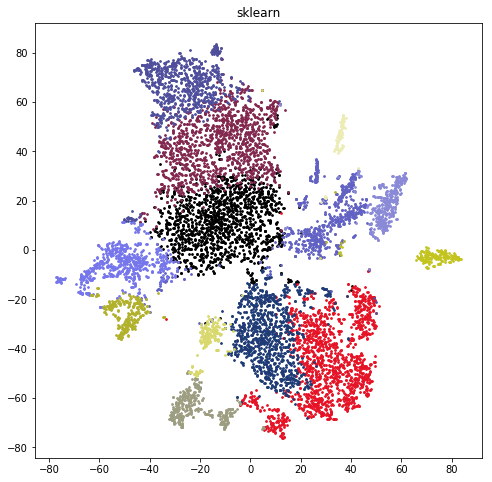

In [11]:
plt.figure(figsize=(8, 8))
pseq.viz.scatter(tsne, color_by="cluster", s=3)
plt.title('sklearn')
plt.show()

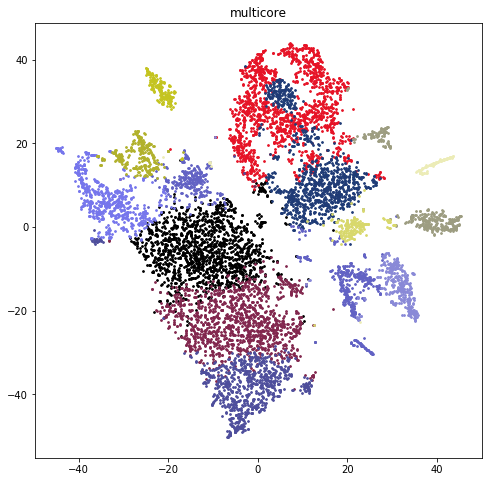

In [13]:
plt.figure(figsize=(8, 8))
pseq.viz.scatter(tsne, color_by="cluster", s=3)
plt.title('multicore')
plt.show()

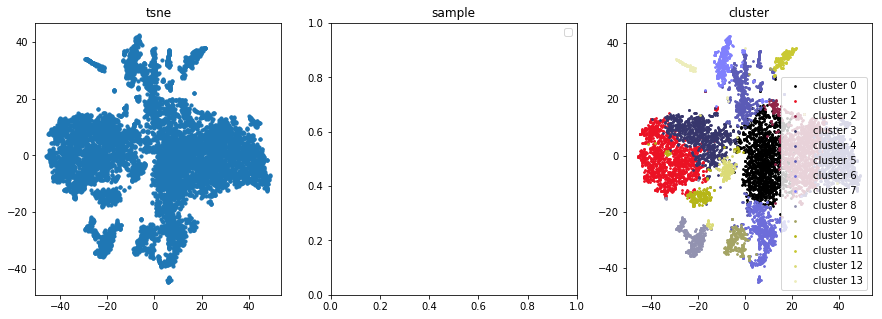

In [12]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
pseq.viz.scatter(tsne, s=10)
plt.title('tsne')

plt.subplot(1, 3, 2)
pseq.viz.scatter(tsne, color_by="sample", s=10)
plt.title('sample')
plt.legend(["brain", "vnc"], scatterpoints=1)

plt.subplot(1, 3, 3)
pseq.viz.scatter(tsne, color_by="cluster", s=3)
plt.title('cluster')
plt.legend()

plt.show()

In [15]:
top_genes = pseq.upregulated(normed, n=3)

print("\n\n---\n")
for i, genes in enumerate(top_genes):
    print(genes)

finding genes for cluster 1
[LibLinear]finding genes for cluster 2
[LibLinear]finding genes for cluster 3
[LibLinear]finding genes for cluster 4
[LibLinear]finding genes for cluster 5
[LibLinear]finding genes for cluster 6
[LibLinear]

---

['MRE16', 'CR40469', 'Pen']
['Galphao', 'ImpL3', 'Alk']
['miple1', 'dpr8', 'noe']
['Hex-A', 'CG30172', 'fax']
['Antp', 'hdc', 'His4r']
['Obp44a', 'CAH1', 'MFS9']


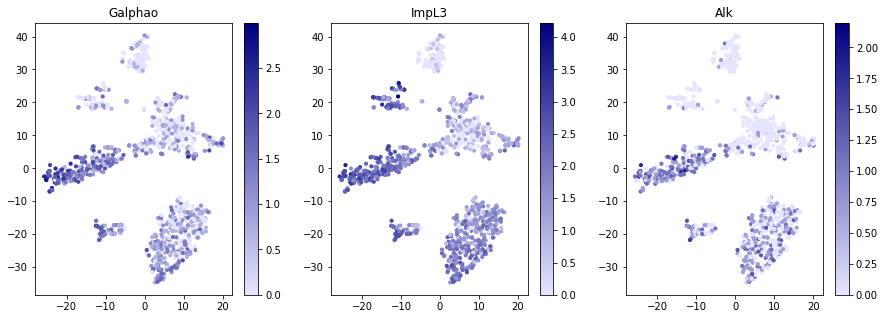

In [16]:
plt.figure(figsize=(15, 5))

import seaborn as sns
cmap = sns.light_palette('navy', as_cmap=True)

# look at expression profile for top genes from cluster 4
genes = top_genes[1]
for i, gene in enumerate(genes):
    plt.subplot(1, len(genes), i+1)
    pseq.viz.scatter(tsne, color_by=normed[gene], cmap=cmap, s=10)
    plt.title(gene)
    plt.colorbar()

plt.show()

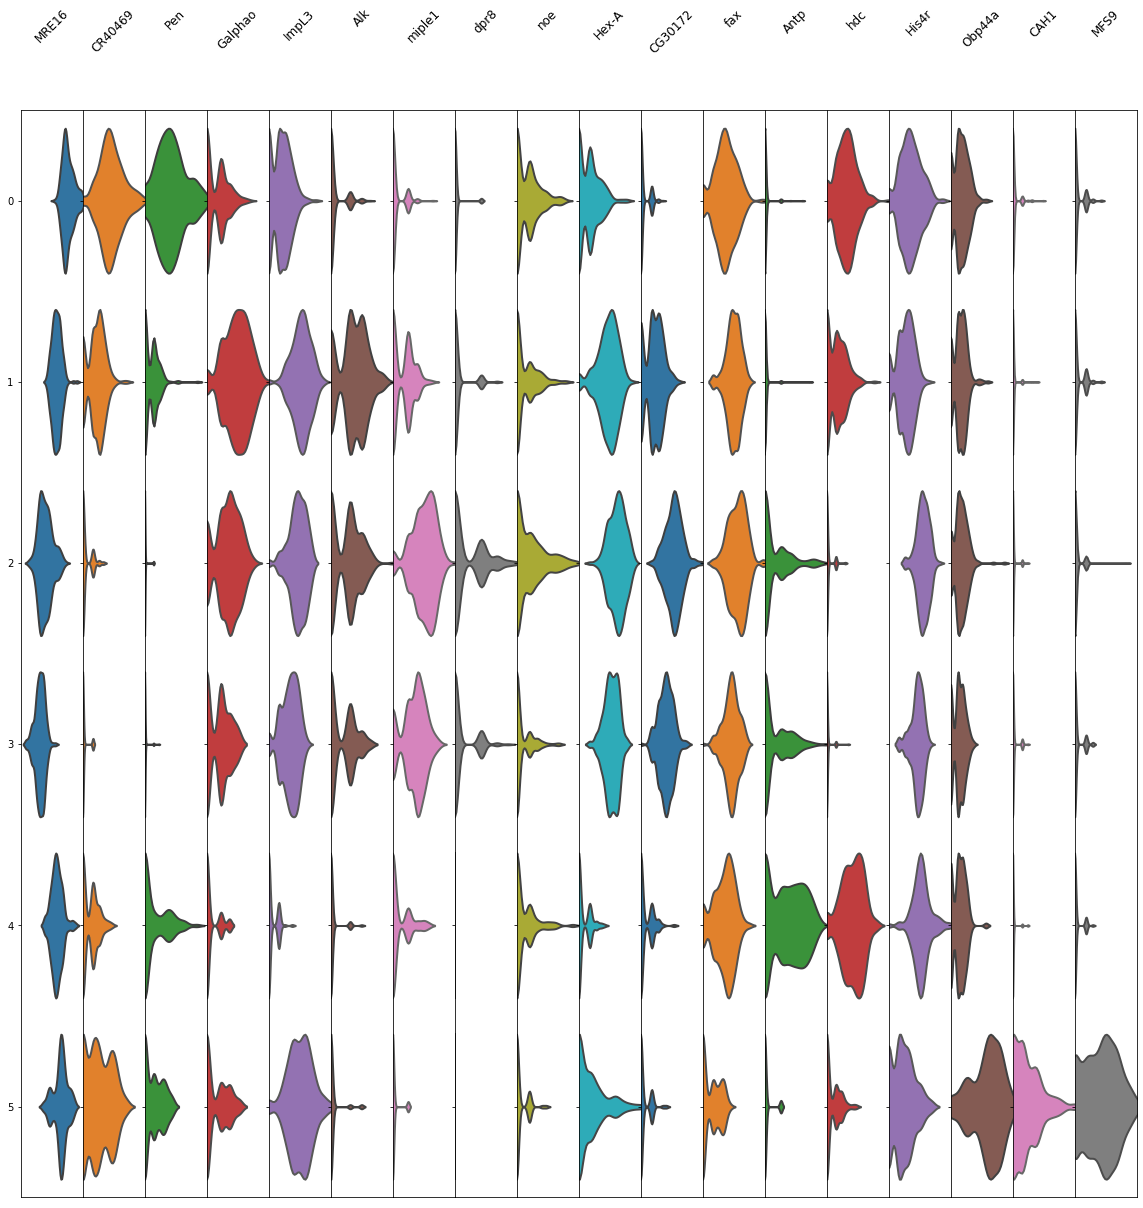

In [17]:
genes = sum(top_genes, []) # append all lists into single list
pseq.viz.violins(normed, genes, group_by='cluster', cluster_genes=False)